## WHO Maternal Mortality Data Exploration
### Introduction
Maternal health, encompassing the well-being of women during pregnancy, childbirth, and the postnatal period, remains a critical global concern. Despite advancements over the past two decades, the toll of maternal mortality persists at an alarming rate. In 2020 alone, approximately 287,000 women lost their lives due to complications arising from pregnancy and childbirth, a figure deemed unacceptably high by global health agencies[[1](https://www.who.int/health-topics/maternal-health#tab=tab_1)].

The leading causes of maternal mortality include direct factors such as excessive blood loss, infections, high blood pressure, unsafe abortion, and obstructed labor, alongside indirect factors like anemia, malaria, and heart disease. Distressingly, most of these deaths are preventable with timely intervention by skilled healthcare professionals in supportive environments. Addressing these disparities requires a multifaceted approach. Poverty often intertwines with poor reproductive health outcomes, as marginalized groups struggle to access antenatal and postpartum care[[2](https://www.who.int/europe/news-room/fact-sheets/item/maternal-and-newborn-health)]. Furthermore, the dynamics of maternal mortality vary across regions. 

Efforts to combat maternal mortality must extend beyond mere survival to encompass comprehensive care that promotes health and well-being. Central to this endeavor is ensuring equitable access to quality maternity care, addressing systemic inequalities, and safeguarding sexual and reproductive health rights. With the overarching goal of ending preventable maternal deaths, this project aims to explore maternal health data, shedding light on critical insights and guiding interventions to protect the lives of mothers and newborns worldwide.

### inspo, delete
https://informationisbeautiful.net/beautifulnews/495-russia-suicides-down/
i think this makes for a good model of what i'd like a timeline tracker to look like
https://informationisbeautiful.net/beautifulnews/1254-hiv-aids-remission/
this one too-- hoping there is a ANC coverage percentage stat or something nice like that

https://mmr2020.srhr.org/data
https://iris.who.int/bitstream/handle/10665/366225/9789240068759-eng.pdf?sequence=1

### Data collection
Considering that the main page on Maternal health lists infections, high blood pressure, unsafe abortion, and obstructed labor, alongside indirect factors like anemia, malaria, and heart disease as the most common causes of maternal injury and death, I will use these to guide my selection of indicators, while also considering markers related to poverty, underdevelopment, and access to antenatal and postpartum care. Souza et al does a great job bringing indirect social factors to the table in their systematic review, which I will also be considering for my data collection[[3](https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(23)00468-0/fulltext)].

The analysts at WHO have done a phenomenal job aggregating data and developing estimates in their 2023 publication on maternal health over 2000 to 2020 such that I could not fathom attempting to replicate; as such I will be using data pulled solely from the WHO MATERNAL, NEWBORN, CHILD AND ADOLESCENT HEALTH AND AGEING data portal, and developing visualizations for longitudinal global progress and doing some correlation investigation of my own[[4](https://www.who.int/publications/i/item/9789240068759)][[5](https://platform.who.int/data/maternal-newborn-child-adolescent-ageing/indicator-explorer-new)].

I looked at all the indicators and selected only the quantitative ones related to maternal health and environmental/economic conditions that may have a relationship. I chose to not include any indicators related to neonatal health or the under-5 population for pertinence and brevity. I thought the policy indicators were interesting, but not relevant to any correlation explorations because most if not all of the data is boolean, rather than numeric data. This would be interesting for a visualization split.

Here is a look of the indicators I pulled from the portal; metadata can be accessed directly from the data portal link above.

- Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)

Maternal health conditions
- Antenatal care coverage - at least four visits (%)
- Proportion of births delivered in a health facility
- Proportion of births attended by skilled health personnel (SDG 3.1.2)
- Proportion of women accessing antenatal care services who were tested for syphilis
- Proportion of mothers who had postnatal contact with a health provider within 2 days of delivery
- Proportion of women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (SDG 3.7.1)
- Contraceptive prevalence - any modern method (among women aged 15-49 years)
- Prevalence of anaemia in non-pregnant women aged 15-49 years (%) (SDG 2.2.3)
- Prevalence of anaemia in pregnant women aged 15-49 years (%) (SDG 2.2.3)
- Proportion of women with a live birth who received iron tablets or syrup during antenatal care

Social/economic conditions
- Crude death rate (deaths per 1000 population)
- Median age (years)
- Sex ratio at birth (male births per female births)
- Total fertility rate (live births per woman)
- Frequency of meetings of national panel to review maternal deaths
- Health expenditures on Maternal Conditions, in constant (2020) international \$ (PPP) per capita
- Health expenditures on Contraceptive Management (Family Planning), in constant (2020) international \$ (PPP) per capita
- Health expenditures on Reproductive Health, in constant (2020) international \$ (PPP) per capita
- Proportion of population below the international poverty line (SDG 1.1.1)
- Population using at least basic drinking-water services (%) (SDG 6.1.1)
- Population using at least basic sanitation services (%) (SDG 6.2.1)
- Proportion of population using improved water supplies
- Proportion of population using improved sanitation facilities (excluding shared)
- Proportion of handwashing facility on premises with soap and water (SDG 6.2.1)

I wanted to use the indicator "Youth literacy rate, population 15-24 years (%)", but it seems the data is relatively sparse and focused on just a couple regions with little to no country data. Data download from this portal only allows for 10 indicators at once, so I completed it in 3 chunks, each one including maternal mortality, for a total of 25 indicators including maternal mortality.

Maternal mortality data stops at 2020; parallel to the WHO Trends in maternal mortality publication in 2023, I will be pulling data from the years 2000 to 2020.

### Data exploration
WHO has aggregated their own data into annual Sustainable Development Goals (SDG) regional, income, and global chunks, but sparingly, likely dependent on completeness of data and relevance to the SDG missions.

In `maternaldata.xlsx`, the indicators that have global/regional data are Sex Ratio at Birth (every 5 years) and Total Fertility Rate (annual).<br>
In `maternaldata2.xlsx`, the indicators that have global/regional data are Crude Death Rate (annual) and Median Age (every 5 years).<br>
In `maternaldata3.xlsx`, the indicators that have global/regional data are Proportion of population below the international poverty line (annual 2000-2019), Proportion of population using improved sanitation facilities (annual 2009-2017), and Proportion of population using improved water supplies (annual 2009-2017).

Due to the sparse nature of the global/regional data, I will be aggregating my own regional/global data based on the WHO regions: Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, and Western Pacific.

In [227]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata.csv")
df2=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata2.csv")
df3=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata3.csv")

C:\Users\Michelle Zhou\AppData\Local\Temp\ipykernel_10092\3099664767.py:2: DtypeWarning: Columns (3,5,8,11,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata2.csv")
C:\Users\Michelle Zhou\AppData\Local\Temp\ipykernel_10092\3099664767.py:3: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv("C:\\Users\\Michelle Zhou\\Documents\\2024\\who maternal project\\maternaldata3.csv")


In [158]:
print(df.columns.tolist())

['Indicator', 'Year', 'Country', 'Global', 'WHO region', 'SDG region', 'World bank income group', 'Age group', 'Measure', 'Residence area', 'Sex', 'Wealth quintile', 'Datasource short', 'Datasource long', 'Comments', 'Value Numeric', 'Value String', 'Value low', 'Value high']


In [159]:
print(df2.columns.tolist())

['Indicator', 'Year', 'Country', 'Global', 'WHO region', 'SDG region', 'World bank income group', 'Age group', 'Measure', 'Mother education', 'Residence area', 'SAB definition', 'Wealth quintile', 'Datasource short', 'Datasource long', 'Comments', 'Value Numeric', 'Value String', 'Value low', 'Value high']


In [160]:
print(df3.columns.tolist())

['Indicator', 'Year', 'Country', 'Global', 'WHO region', 'SDG region', 'World bank income group', 'Imp. sanitation', 'Imp. water', 'Residence area', 'Sex', 'Comments', 'Value Numeric', 'Value String', 'Value low', 'Value high']


In [161]:
df.dtypes

Indicator                   object
Year                         int64
Country                     object
Global                      object
WHO region                  object
SDG region                  object
World bank income group     object
Age group                   object
Measure                     object
Residence area              object
Sex                         object
Wealth quintile             object
Datasource short            object
Datasource long             object
Comments                    object
Value Numeric              float64
Value String                object
Value low                  float64
Value high                 float64
dtype: object

In [162]:
df2.dtypes

Indicator                   object
Year                         int64
Country                     object
Global                      object
WHO region                  object
SDG region                  object
World bank income group     object
Age group                   object
Measure                     object
Mother education            object
Residence area              object
SAB definition              object
Wealth quintile             object
Datasource short            object
Datasource long             object
Comments                    object
Value Numeric              float64
Value String                object
Value low                  float64
Value high                 float64
dtype: object

In [163]:
df3.dtypes

Indicator                   object
Year                         int64
Country                     object
Global                      object
WHO region                  object
SDG region                 float64
World bank income group     object
Imp. sanitation             object
Imp. water                  object
Residence area              object
Sex                        float64
Comments                   float64
Value Numeric              float64
Value String                object
Value low                  float64
Value high                 float64
dtype: object

In [164]:
# changing numeric values of maternal death panel frequency since they are codes and not actual values that represent numeric data
df.loc[df['Value String'] == 'Does not apply', 'Value Numeric'] = 0
df.loc[df['Value String'] == 'Unknown', 'Value Numeric'] = float('nan')
df.loc[df['Value String'] == 'ANNUALLY', 'Value Numeric'] = 1
df.loc[df['Value String'] == 'SEMI-ANNUALLY', 'Value Numeric'] = 2
df.loc[df['Value String'] == 'QUARTERLY', 'Value Numeric'] = 4
df.loc[df['Value String'] == 'MONTHLY', 'Value Numeric'] = 12

In [165]:
df_wide = (df.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
df_wide.head()

,Country,Year,WHO region,World bank income group,Antenatal care coverage - at least four visits (%),Frequency of meetings of national panel to review maternal deaths,Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1),Prevalence of anaemia in non-pregnant women aged 15-49 years (%) (SDG 2.2.3),Prevalence of anaemia in pregnant women aged 15-49 years (%) (SDG 2.2.3),Proportion of mothers who had postnatal contact with a health provider within 2 days of delivery,Proportion of women accessing antenatal care services who were tested for syphilis,Proportion of women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (SDG 3.7.1),Sex ratio at birth (male births per female births),Total fertility rate (live births per woman)
0,Afghanistan,2000,Eastern Mediterranean,Low income,NaN,NaN,1346.14410,34.2,44.4,NaN,NaN,21.0,106.5,7.485
1,Afghanistan,2001,Eastern Mediterranean,Low income,NaN,NaN,1273.43134,34.1,43.9,NaN,NaN,22.6,NaN,7.387
2,Afghanistan,2002,Eastern Mediterranean,Low income,NaN,NaN,1277.30797,34.1,43.4,NaN,NaN,24.6,NaN,7.272
3,Afghanistan,2003,Eastern Mediterranean,Low income,NaN,NaN,1196.09069,34.2,42.9,NaN,NaN,26.7,NaN,7.148
4,Afghanistan,2004,Eastern Mediterranean,Low income,NaN,NaN,1114.88723,34.4,42.4,NaN,NaN,29.0,NaN,7.016


In [166]:
df_wide = df_wide.rename(columns={'Antenatal care coverage - at least four visits (%)':'Antenatal care coverage',
                                  'Frequency of meetings of national panel to review maternal deaths':'Maternal death panel',
                                  'Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)':'Maternal mortality ratio',
                                  'Prevalence of anaemia in non-pregnant women aged 15-49 years (%) (SDG 2.2.3)':'Nonpregnant anemia',
                                  'Prevalence of anaemia in pregnant women aged 15-49 years (%) (SDG 2.2.3)':'Pregnant anemia',
                                  'Proportion of mothers who had postnatal contact with a health provider within 2 days of delivery':'Postnatal contact',
                                  'Proportion of women accessing antenatal care services who were tested for syphilis':'Syphilis test during pregnancy',
                                  'Proportion of women of reproductive age (aged 15-49 years) who have their need for family planning satisfied with modern methods (SDG 3.7.1)':'Modern family planning',
                                  'Sex ratio at birth (male births per female births)':'Birth sex ratio male to female',
                                  'Total fertility rate (live births per woman)':'Total fertility rate'})
df_wide.head()

,Country,Year,WHO region,World bank income group,Antenatal care coverage,Maternal death panel,Maternal mortality ratio,Nonpregnant anemia,Pregnant anemia,Postnatal contact,Syphilis test during pregnancy,Modern family planning,Birth sex ratio m to f,Total fertility rate
0,Afghanistan,2000,Eastern Mediterranean,Low income,NaN,NaN,1346.14410,34.2,44.4,NaN,NaN,21.0,106.5,7.485
1,Afghanistan,2001,Eastern Mediterranean,Low income,NaN,NaN,1273.43134,34.1,43.9,NaN,NaN,22.6,NaN,7.387
2,Afghanistan,2002,Eastern Mediterranean,Low income,NaN,NaN,1277.30797,34.1,43.4,NaN,NaN,24.6,NaN,7.272
3,Afghanistan,2003,Eastern Mediterranean,Low income,NaN,NaN,1196.09069,34.2,42.9,NaN,NaN,26.7,NaN,7.148
4,Afghanistan,2004,Eastern Mediterranean,Low income,NaN,NaN,1114.88723,34.4,42.4,NaN,NaN,29.0,NaN,7.016


In [167]:
len(df_wide)

4395

In [168]:
df2_wide = (df2.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
df2_wide.head()
# I see that the indicator i wanted to say "Health expenditures on Contraceptive Management (Family Planning), in constant (2020) international $ (PPP) per capita" says "Health expenditures on the less than five-year-old population (<5-y),in constant (2020) international $ (PPP) per capita"
# I thought maybe this was a mistake I made but it was not; I went to the WHO indicator site and cross referenced the value data between the two pages and despite having the same indicator name, the data values are completely different. i am continuing to operate as if this is just a nominative mistake and the data is not impacted, and changing the column name

,Country,Year,WHO region,World bank income group,Contraceptive prevalence - any modern method (among women aged 15-49 years),Crude death rate (deaths per 1000 population),"Health expenditures on Maternal Conditions,in constant (2020) international $ (PPP) per capita","Health expenditures on Reproductive Health,in constant (2020) international $ (PPP) per capita","Health expenditures on the less than five-year-old population (<5-y),in constant (2020) international $ (PPP) per capita",Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1),Median age (years),Proportion of births attended by skilled health personnel (SDG 3.1.2),Proportion of births delivered in a health facility,Proportion of women with a live birth who received iron tablets or syrup during antenatal care
0,Afghanistan,2000,Eastern Mediterranean,Low income,7.6,11.718,NaN,NaN,NaN,1346.14410,14.127,NaN,NaN,NaN
1,Afghanistan,2001,Eastern Mediterranean,Low income,8.4,11.387,NaN,NaN,NaN,1273.43134,14.059,NaN,NaN,NaN
2,Afghanistan,2002,Eastern Mediterranean,Low income,9.3,11.048,NaN,NaN,NaN,1277.30797,14.025,NaN,NaN,NaN
3,Afghanistan,2003,Eastern Mediterranean,Low income,10.4,10.704,NaN,NaN,NaN,1196.09069,14.017,14.3,12.9,NaN
4,Afghanistan,2004,Eastern Mediterranean,Low income,11.7,10.356,NaN,NaN,NaN,1114.88723,14.033,NaN,NaN,NaN


In [169]:
df2_wide = df2_wide.rename(columns={'Contraceptive prevalence - any modern method (among women aged 15-49 years)':'Contraceptive prevalence',
                                  'Crude death rate (deaths per 1000 population)':'Crude death rate',
                                  'Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)':'Maternal mortality ratio',
                                  'Health expenditures on Maternal Conditions,in constant (2020) international $ (PPP) per capita':'Maternal spending per capita',
                                  'Health expenditures on Reproductive Health,in constant (2020) international $ (PPP) per capita':'Reproductive spending per capita',
                                  'Health expenditures on the less than five-year-old population (<5-y),in constant (2020) international $ (PPP) per capita':'Contraceptive spending per capita',
                                  'Median age (years)':'Median age',
                                  'Proportion of births attended by skilled health personnel (SDG 3.1.2)':'Skilled health personnel birth',
                                  'Proportion of births delivered in a health facility':'Health facility birth',
                                  'Proportion of women with a live birth who received iron tablets or syrup during antenatal care':'Iron supplements during pregnancy'})
df2_wide.head()

,Country,Year,WHO region,World bank income group,Contraceptive prevalence,Crude death rate,Maternal spending per capita,Reproductive spending per capita,Contraceptive spending per capita,Maternal mortality ratio,Median age,Skilled health personnel birth,Health facility birth,Iron supplements during pregnancy
0,Afghanistan,2000,Eastern Mediterranean,Low income,7.6,11.718,NaN,NaN,NaN,1346.14410,14.127,NaN,NaN,NaN
1,Afghanistan,2001,Eastern Mediterranean,Low income,8.4,11.387,NaN,NaN,NaN,1273.43134,14.059,NaN,NaN,NaN
2,Afghanistan,2002,Eastern Mediterranean,Low income,9.3,11.048,NaN,NaN,NaN,1277.30797,14.025,NaN,NaN,NaN
3,Afghanistan,2003,Eastern Mediterranean,Low income,10.4,10.704,NaN,NaN,NaN,1196.09069,14.017,14.3,12.9,NaN
4,Afghanistan,2004,Eastern Mediterranean,Low income,11.7,10.356,NaN,NaN,NaN,1114.88723,14.033,NaN,NaN,NaN


In [170]:
len(df2_wide)

4410

In [171]:
df3_wide = (df3.pivot_table(index=['Country', 'Year', 'WHO region', 'World bank income group'], 
                      columns='Indicator', 
                      values='Value Numeric', 
                      aggfunc='first')
        .reset_index()
        .rename_axis(None, axis=1))
df3_wide.head()

,Country,Year,WHO region,World bank income group,Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1),Population using at least basic drinking-water services (%) (SDG 6.1.1),Population using at least basic sanitation services (%) (SDG 6.2.1),Proportion of handwashing facility on premises with soap and water (SDG 6.2.1),Proportion of population below the international poverty line (SDG 1.1.1 ),Proportion of population using improved sanitation facilities (excluding shared),Proportion of population using improved water supplies
0,Afghanistan,2000,Eastern Mediterranean,Low income,1346.14410,19.74518,18.19808,NaN,NaN,19.0,28.0
1,Afghanistan,2001,Eastern Mediterranean,Low income,1273.43134,54.60648,20.98235,NaN,NaN,19.0,17.0
2,Afghanistan,2002,Eastern Mediterranean,Low income,1277.30797,56.53996,19.74519,NaN,NaN,1.0,16.0
3,Afghanistan,2003,Eastern Mediterranean,Low income,1196.09069,58.47344,24.10033,NaN,NaN,24.0,41.0
4,Afghanistan,2004,Eastern Mediterranean,Low income,1114.88723,60.40692,25.66624,NaN,NaN,2.0,18.0


In [172]:
df3_wide = df3_wide.rename(columns={'Maternal mortality ratio (per 100 000 live births) (SDG 3.1.1)':'Maternal mortality ratio',
                                  'Population using at least basic drinking-water services (%) (SDG 6.1.1)':'Basic drinking water access',
                                  'Population using at least basic sanitation services (%) (SDG 6.2.1)':'Basic sanitation access',
                                  'Proportion of handwashing facility on premises with soap and water (SDG 6.2.1)':'Soap and water onsite access',
                                  'Proportion of population below the international poverty line (SDG 1.1.1 )':'Population below intl poverty line',
                                  'Proportion of population using improved sanitation facilities (excluding shared)':'Improved sanitation access',
                                  'Proportion of population using improved water supplies':'Improved water access'})
df3_wide.head()

,Country,Year,WHO region,World bank income group,Maternal mortality ratio,Basic drinking water access,Basic sanitation access,Soap and water onsite access,Population below intl poverty line,Improved sanitation access,Improved water access
0,Afghanistan,2000,Eastern Mediterranean,Low income,1346.14410,19.74518,18.19808,NaN,NaN,19.0,28.0
1,Afghanistan,2001,Eastern Mediterranean,Low income,1273.43134,54.60648,20.98235,NaN,NaN,19.0,17.0
2,Afghanistan,2002,Eastern Mediterranean,Low income,1277.30797,56.53996,19.74519,NaN,NaN,1.0,16.0
3,Afghanistan,2003,Eastern Mediterranean,Low income,1196.09069,58.47344,24.10033,NaN,NaN,24.0,41.0
4,Afghanistan,2004,Eastern Mediterranean,Low income,1114.88723,60.40692,25.66624,NaN,NaN,2.0,18.0


In [173]:
len(df3_wide)

4357

In [174]:
dfs = [df_wide, df2_wide, df3_wide]
from functools import reduce
df0 = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year', 'WHO region', 'World bank income group', 'Maternal mortality ratio'],
                                            how='outer'), dfs)
df0.head()

,Country,Year,WHO region,World bank income group,Antenatal care coverage,Maternal death panel,Maternal mortality ratio,Nonpregnant anemia,Pregnant anemia,Postnatal contact,...,Median age,Skilled health personnel birth,Health facility birth,Iron supplements during pregnancy,Basic drinking water access,Basic sanitation access,Soap and water onsite access,Population below intl poverty line,Improved sanitation access,Improved water access
0,Afghanistan,2000,Eastern Mediterranean,Low income,NaN,NaN,1346.14410,34.2,44.4,NaN,...,14.127,NaN,NaN,NaN,19.74518,18.19808,NaN,NaN,19.0,28.0
1,Afghanistan,2001,Eastern Mediterranean,Low income,NaN,NaN,1273.43134,34.1,43.9,NaN,...,14.059,NaN,NaN,NaN,54.60648,20.98235,NaN,NaN,19.0,17.0
2,Afghanistan,2002,Eastern Mediterranean,Low income,NaN,NaN,1277.30797,34.1,43.4,NaN,...,14.025,NaN,NaN,NaN,56.53996,19.74519,NaN,NaN,1.0,16.0
3,Afghanistan,2003,Eastern Mediterranean,Low income,NaN,NaN,1196.09069,34.2,42.9,NaN,...,14.017,14.3,12.9,NaN,58.47344,24.10033,NaN,NaN,24.0,41.0
4,Afghanistan,2004,Eastern Mediterranean,Low income,NaN,NaN,1114.88723,34.4,42.4,NaN,...,14.033,NaN,NaN,NaN,60.40692,25.66624,NaN,NaN,2.0,18.0


In [175]:
len(df0)

4410

In [176]:
dfcorr = df0.drop(['Country', 'Year', 'WHO region', 'World bank income group'], axis='columns')

In [177]:
dfcorr.dtypes

Antenatal care coverage               float64
Maternal death panel                  float64
Maternal mortality ratio              float64
Nonpregnant anemia                    float64
Pregnant anemia                       float64
Postnatal contact                     float64
Syphilis test during pregnancy        float64
Modern family planning                float64
Birth sex ratio m to f                float64
Total fertility rate                  float64
Contraceptive prevalence              float64
Crude death rate                      float64
Maternal spending per capita          float64
Reproductive spending per capita      float64
Contraceptive spending per capita     float64
Median age                            float64
Skilled health personnel birth        float64
Health facility birth                 float64
Iron supplements during pregnancy     float64
Basic drinking water access           float64
Basic sanitation access               float64
Soap and water onsite access      

In [178]:
dfcorr = dfcorr.convert_dtypes(convert_floating=True)

In [179]:
dfcorr.dtypes

Antenatal care coverage               Float64
Maternal death panel                    Int64
Maternal mortality ratio              Float64
Nonpregnant anemia                    Float64
Pregnant anemia                       Float64
Postnatal contact                     Float64
Syphilis test during pregnancy        Float64
Modern family planning                Float64
Birth sex ratio m to f                Float64
Total fertility rate                  Float64
Contraceptive prevalence              Float64
Crude death rate                      Float64
Maternal spending per capita          Float64
Reproductive spending per capita      Float64
Contraceptive spending per capita     Float64
Median age                            Float64
Skilled health personnel birth        Float64
Health facility birth                 Float64
Iron supplements during pregnancy     Float64
Basic drinking water access           Float64
Basic sanitation access               Float64
Soap and water onsite access      

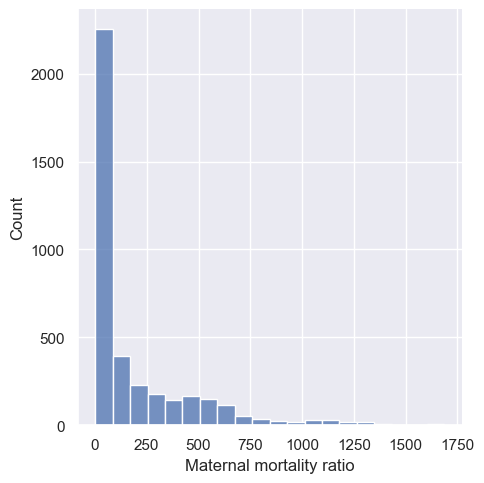

In [180]:
sns.displot(df0['Maternal mortality ratio'], bins=20)
plt.show()

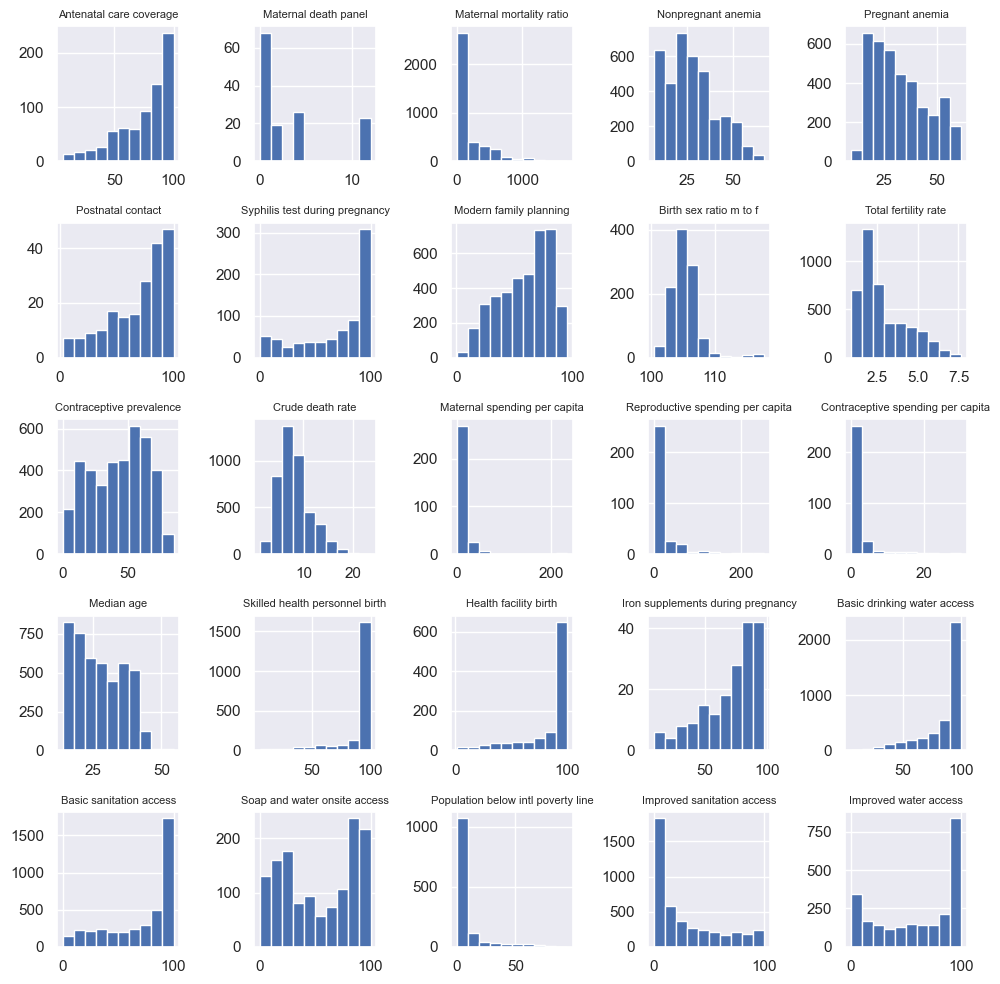

In [219]:
corrarray = dfcorr.hist()
[x.title.set_size(8) for x in corrarray.ravel()]
plt.tight_layout()
plt.show()
# nothing is normally distributed but it's not necesarily something to worry about

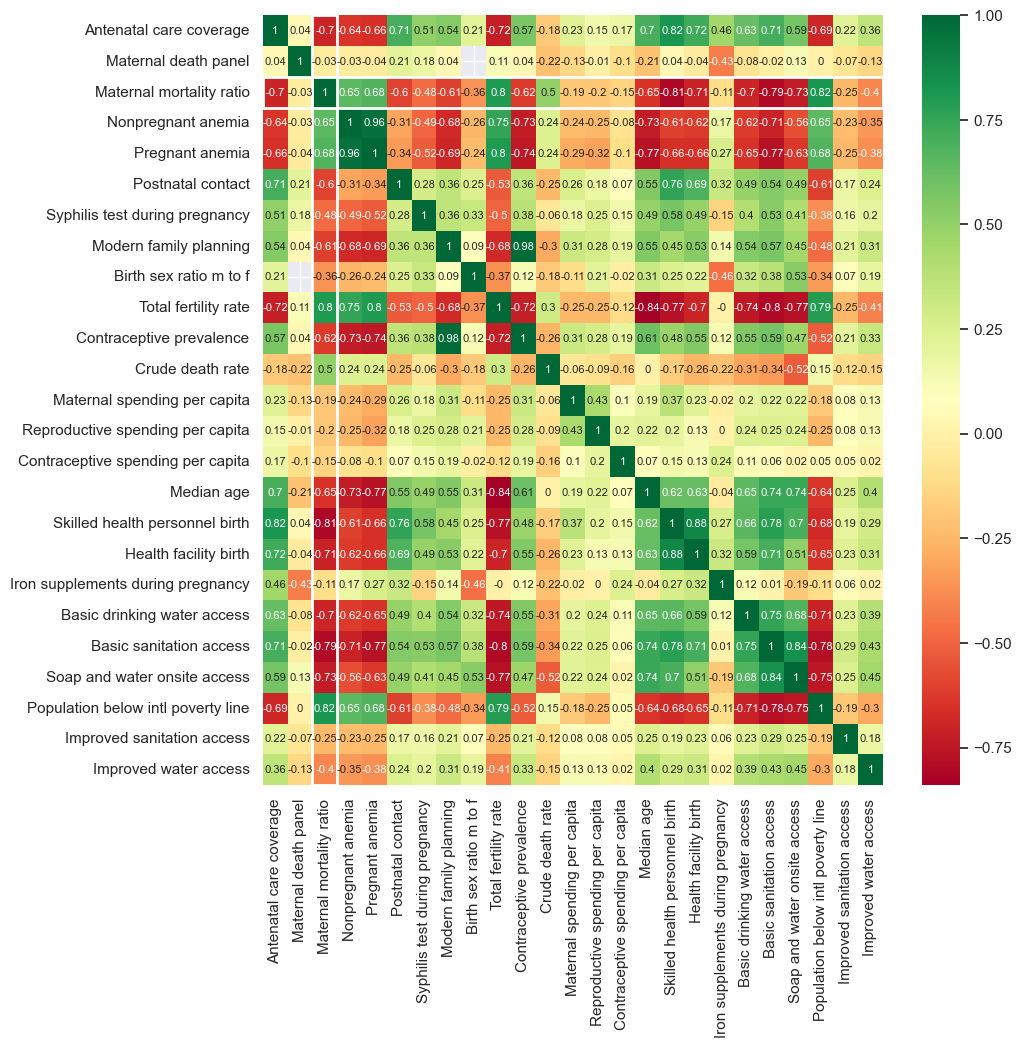

In [226]:
sns.set(rc={'figure.figsize':(10, 10)})
matrix = dfcorr.corr().round(2)
plt_1 = sns.heatmap(matrix, annot=True, annot_kws={"size": 8}, cmap=plt.get_cmap('RdYlGn'))
# plt_1 = plt.figure(figsize=(15, 15))
plt.axvline(x=2, linewidth=2, color='w')
plt.axvline(x=3, linewidth=2, color='w')
plt.axhline(y=0, xmin=0.08, xmax=0.12, linewidth=2, color='w')
plt.axhline(y=25, xmin=0.08, xmax=0.12, linewidth=2, color='w')
plt.axhline(y=2, linewidth=2, color='w')
plt.axhline(y=3, linewidth=2, color='w')
plt.axvline(x=0, ymin=0.88, ymax=0.92, linewidth=2, color='w')
plt.axvline(x=25, ymin=0.88, ymax=0.92, linewidth=2, color='w')
plt.show()

I've highlighted the maternal mortality ratio squares with a white border. There is a hole for maternal death panel and birth sex ratio because birth sex ratio was only polled every 5 years on years divisible by 5 and maternal death panel was only taken in 2018.

Parallels can be seen between maternal mortality ratio, nonpregnant anemia, pregnant anemia, total fertility rate, and population below the int'l poverty line, implying that they share a similar relationship to the other indicators.

Similarly, maternal mortality ratio colors seem to be the inverse of antenatal care coverage, postnatal contact, syphilis test during pregnancy, modern family planning, contraceptive prevalence, median age, skilled health personnel (during) birth, health facility birth, basic drinking water access, basic sanitation access, and soap and water onsite access.

Similar can also be said about maternal death panel, birth sex ratio, maternal spending per capita, reproductive spending per capita, contraceptive spending per capita, improved sanitation access, and improved water access, but these seem to be a lot weaker in their relationships to the other indicators.

Let's look at the p-values of the correlations with maternal mortality ratio. `pd.DataFrame.corr()` default method is Pearson, so let's proceed with Pearson's method. `scipy.stats.pearsonr()` has long since scrubbed support of `NaN` values so we must do it in a work-around way, and cannot be aggregated into a table very conveniently:

In [247]:
for i in range(len(df0)):
    xl = df0['Maternal mortality ratio'].dropna()
    ya = df0['Antenatal care coverage'].dropna()
    da = pd.concat([xl,ya], axis = 1)
    da = da.dropna()
scipy.stats.pearsonr(da['Maternal mortality ratio'], da['Antenatal care coverage'])

PearsonRResult(statistic=-0.6981292698317653, pvalue=5.435127837723866e-106)

In [253]:
for i in range(len(df0)):
    yb = df0['Maternal death panel'].dropna()
    db = pd.concat([xl,yb], axis = 1)
    db = db.dropna()
scipy.stats.pearsonr(db['Maternal mortality ratio'], db['Maternal death panel'])

PearsonRResult(statistic=-0.03291625172361255, pvalue=0.7122383042785819)

In [254]:
for i in range(len(df0)):
    yc = df0['Nonpregnant anemia'].dropna()
    dc = pd.concat([xl,yc], axis = 1)
    dc = dc.dropna()
scipy.stats.pearsonr(dc['Maternal mortality ratio'], dc['Nonpregnant anemia'])

PearsonRResult(statistic=0.6505514492801856, pvalue=0.0)

In [250]:
dc.head(10)

,Maternal mortality ratio,Nonpregnant anemia
0,1346.14410,34.2
1,1273.43134,34.1
2,1277.30797,34.1
3,1196.09069,34.2
4,1114.88723,34.4
5,1102.80976,34.7
6,1044.40033,35.0
7,1023.49547,35.3
8,962.32152,35.6
9,913.03576,36.0


In [251]:
# Looks normal.
dc.tail(10)

,Maternal mortality ratio,Nonpregnant anemia
4378,618.32971,30.6
4379,562.12072,30.1
4380,527.61644,29.7
4381,495.25712,29.3
4382,440.85211,29.0
4383,408.11898,28.8
4384,399.75752,28.7
4385,366.38103,28.6
4386,358.50350,28.6
4387,393.17629,28.7


I was concerned that a p-value of 0.0 was an error at first, but upon further reading I found that a value can be so low that Python cannot distinguish it from floating value 0.0. This happens at numbers below 7.1429666685167604e-293 and can easily be produced if the number of points is above 1000[[6](https://stackoverflow.com/questions/20530138/scipy-p-value-returns-0-0)].

In [252]:
for i in range(len(df0)):
    yd = df0['Pregnant anemia'].dropna()
    dd = pd.concat([xl,yd], axis = 1)
    dd = dd.dropna()
scipy.stats.pearsonr(dd['Maternal mortality ratio'], dd['Pregnant anemia'])

PearsonRResult(statistic=0.6789365323174925, pvalue=0.0)

In [255]:
for i in range(len(df0)):
    ye = df0['Postnatal contact'].dropna()
    de = pd.concat([xl,ye], axis = 1)
    de = de.dropna()
scipy.stats.pearsonr(de['Maternal mortality ratio'], de['Postnatal contact'])

PearsonRResult(statistic=-0.6004215391612608, pvalue=2.176118212188441e-20)

In [256]:
for i in range(len(df0)):
    yg = df0['Syphilis test during pregnancy'].dropna()
    dg = pd.concat([xl,yg], axis = 1)
    dg = dg.dropna()
scipy.stats.pearsonr(dg['Maternal mortality ratio'], dg['Syphilis test during pregnancy'])

PearsonRResult(statistic=-0.48266781261750097, pvalue=4.652488475752444e-43)

In [257]:
for i in range(len(df0)):
    yh = df0['Modern family planning'].dropna()
    dh = pd.concat([xl,yh], axis = 1)
    dh = dh.dropna()
scipy.stats.pearsonr(dh['Maternal mortality ratio'], dh['Modern family planning'])

PearsonRResult(statistic=-0.6094281325884888, pvalue=0.0)

In [258]:
for i in range(len(df0)):
    yi = df0['Birth sex ratio m to f'].dropna()
    di = pd.concat([xl,yi], axis = 1)
    di = di.dropna()
scipy.stats.pearsonr(di['Maternal mortality ratio'], di['Birth sex ratio m to f'])

PearsonRResult(statistic=-0.3593807313969674, pvalue=1.9710017154746297e-29)

In [259]:
for i in range(len(df0)):
    yj = df0['Total fertility rate'].dropna()
    dj = pd.concat([xl,yj], axis = 1)
    dj = dj.dropna()
scipy.stats.pearsonr(dj['Maternal mortality ratio'], dj['Total fertility rate'])

PearsonRResult(statistic=0.8020730188657891, pvalue=0.0)

In [260]:
for i in range(len(df0)):
    yk = df0['Contraceptive prevalence'].dropna()
    dk = pd.concat([xl,yk], axis = 1)
    dk = dk.dropna()
scipy.stats.pearsonr(dk['Maternal mortality ratio'], dk['Contraceptive prevalence'])

PearsonRResult(statistic=-0.6223501591906242, pvalue=0.0)

In [261]:
for i in range(len(df0)):
    yl = df0['Crude death rate'].dropna()
    dl = pd.concat([xl,yl], axis = 1)
    dl = dl.dropna()
scipy.stats.pearsonr(dl['Maternal mortality ratio'], dl['Crude death rate'])

PearsonRResult(statistic=0.5022034164019608, pvalue=4.76148355034036e-246)

In [262]:
for i in range(len(df0)):
    ym = df0['Maternal spending per capita'].dropna()
    dm = pd.concat([xl,ym], axis = 1)
    dm = dm.dropna()
scipy.stats.pearsonr(dm['Maternal mortality ratio'], dm['Maternal spending per capita'])

PearsonRResult(statistic=-0.18884872844011752, pvalue=0.0008830110809656137)